## Decision Tree Regression 

In [9]:
#import bibliotecas

import numpy as np
import pandas as pd

from sklearn import tree    as tr
from sklearn import metrics as mt

from matplotlib import pyplot as plt

### Datasets

In [3]:
X_train = pd.read_csv('X_training.csv')
y_train = pd.read_csv('y_training.csv') 
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')
X_val = pd.read_csv('X_validation.csv')
y_val = pd.read_csv('y_val.csv') 

In [4]:
X_val.head(2)

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.143252,0.025900,0.616,0.933,0.0000,0.000000,0.359,0.962307,0,0.0513,0.309853,0.8,0.806
1,0.363603,0.000188,0.490,0.972,0.0299,0.909091,0.368,0.765216,0,0.1110,-0.908089,0.8,0.376


In [5]:
# preparação dos dados 

y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

### Dados de Treino

In [24]:
md_list = np.arange(2, 40, 1)
rsme_list = []

for i in md_list:
    
    # definition
    model = tr.DecisionTreeRegressor(max_depth = i)

    # fit
    model.fit( X_train, y_train )

    # performance
    ypred_train = model.predict( X_train )

    #rsme 
    mse = round(mt.mean_squared_error( y_train , ypred_train),2)
    rmse = np.sqrt(mse)
    rsme_list.append(rmse)


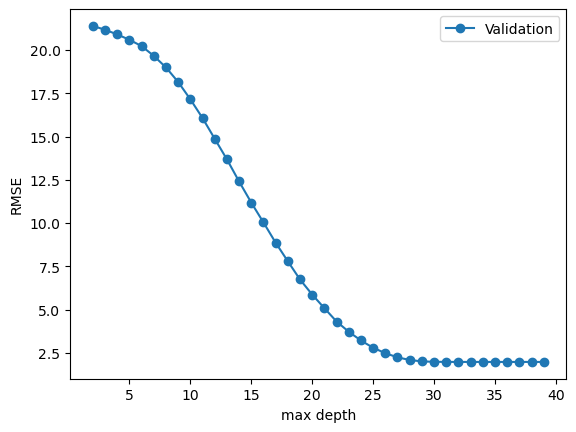

In [25]:
plt.plot( md_list, rsme_list, '-o', label='Validation' )
plt.xlabel('max depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()

**max_depth encontrado é:**

In [26]:
best_md = rsme_list.index(min(rsme_list))
best_md 

30

In [30]:
# definition
model = tr.DecisionTreeRegressor(max_depth = best_md)

# fit
model.fit( X_train, y_train )

# performance
ypred_train = model.predict( X_train )

#R2 
r2 = round(mt.r2_score( y_train , ypred_train),3)
print( 'R2: {}'.format(r2))

#mse 
mse = round(mt.mean_squared_error( y_train , ypred_train),2)
print( 'MSE: {}'.format(mse))

#rmse
rmse = round(np.sqrt(mse),2)
print( 'RMSE: {}'.format(rmse))

#mae
mae = np.round(mt.mean_absolute_error( y_train , ypred_train), 2)
print('MAE: {}'.format( mae ))

#mape
mape = np.round(mt.mean_absolute_percentage_error( y_train , ypred_train), 2) 
print('MAPE: {}%'.format( mape ) )

R2: 0.992
MSE: 3.97
RMSE: 1.99
MAE: 0.23
MAPE: 0.08%


### Dados de Validação

In [31]:
# definition
model = tr.DecisionTreeRegressor(max_depth = best_md)

# fit
model.fit( X_train, y_train )

# performance
ypred_val = model.predict( X_val )

#R2
r2 = round(mt.r2_score( y_val , ypred_val),3)
print( 'R2: {}'.format(r2))

#mse
mse = round(mt.mean_squared_error( y_val , ypred_val),2)
print ('MSE: {}'.format(mse))

#rmse 
rmse = round(np.sqrt(mse),2)
print ('RMSE: {}'.format(rmse))

#mae
mae = np.round(mt.mean_absolute_error( y_val , ypred_val), 2)
print('MAE: {}'.format( mae ))

#mape
mape = np.round(mt.mean_absolute_percentage_error( y_val , ypred_val), 2) 
print('MAPE: {}%'.format( mape ) )

R2: -0.292
MSE: 617.1
RMSE: 24.84
MAE: 17.14
MAPE: 6.87%


### Dados de Teste

In [32]:
# definition
model = tr.DecisionTreeRegressor(max_depth = best_md)

# fit
model.fit(np.concatenate(( X_train ,X_val) ),
          np.concatenate((y_train , y_val)))

# performance
ypred_test = model.predict( X_test )

#R2
r2 = round(mt.r2_score( y_test , ypred_test),3)
print( 'R2: {}'.format(r2))

#mse
mse = round(mt.mean_squared_error( y_test , ypred_test),2)
print ('MSE: {}'.format(mse))

#rmse 
rmse = round(np.sqrt(mse),2)
print ('RMSE: {}'.format(rmse))

#mae
mae = np.round(mt.mean_absolute_error(  y_test , ypred_test), 2)
print('MAE: {}'.format( mae ))

#mape
mape = np.round(mt.mean_absolute_percentage_error( y_test, ypred_test), 2) 
print('MAPE: {}%'.format( mape ) )

R2: -0.184
MSE: 576.7
RMSE: 24.01
MAE: 15.94
MAPE: 6.12%


\\?\C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
